In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='/Asbestos_all/'
dataType='images'
annFile='{}/anno/Refined_Asbestos+Stone.json'.format(dataDir,dataType)

outAnnoDir='/Asbestos_all/sem_labels'

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
asbestos stone

COCO supercategories: 



In [5]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['asbestos']);
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [152])
#img = coco.loadImgs(imgIds[0])[0]
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['asbestos','stone'])
imgIds = coco.getImgIds(catIds=catIds)
#imgIds = coco.getImgIds(imgIds = [152])
#img = coco.loadImgs(imgIds[0])[0]

In [7]:
from PIL import Image

#classes = ('asbestos', 'stone', 'background')
#palette = [[146, 17, 162], [112, 128, 0],[0,0,0]]

#classes = ('asbestos', 'background')
#palette = [[146, 17, 162], [15, 15, 15]]

classes = ('background', 'stone', 'asbestos')
palette = [[15,15,15],[112, 128, 0],[146, 17, 162]]

json has labels as: 1-stone, 2-asbestos

segmaps must have asbestos on top

In [8]:
img = coco.loadImgs(imgIds[0])[0]
img


{'id': 1,
 'width': 2592,
 'height': 2048,
 'file_name': '0_10_11_57_04_16-03-2020_1.jpg',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0}

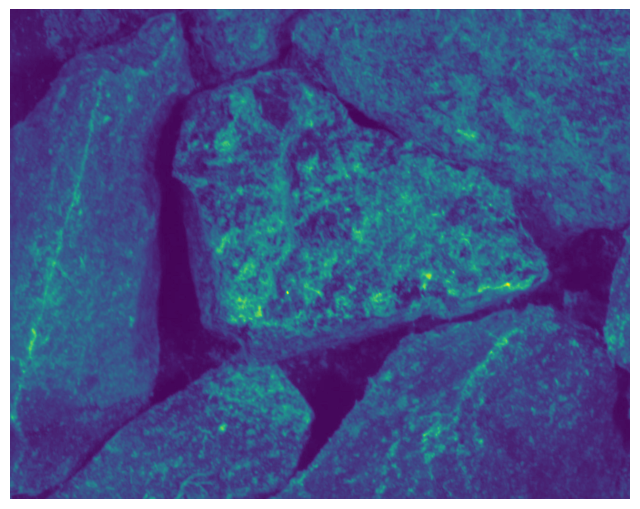

In [9]:
from pathlib import Path

I = io.imread(dataDir+dataType+"/"+img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()



In [10]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
anns

[{'id': 1,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [[149.25,
    1984.02,
    284.96,
    1902.6,
    585.32,
    1622.13,
    628.75,
    1500.9,
    603.42,
    1182.44,
    623.32,
    771.7,
    590.75,
    623.32,
    635.99,
    440.57,
    731.89,
    326.57,
    739.13,
    190.87,
    688.46,
    49.73,
    648.65,
    13.54,
    366.38,
    151.06,
    169.15,
    317.53,
    58.78,
    471.33,
    0.0,
    531.54,
    0.0,
    1986.28,
    75.06,
    2022.02]],
  'area': 1035607.0,
  'bbox': [0.0, 13.54, 739.13, 2008.48],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 2,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [[1244.39,
    1400.72,
    1669.62,
    1316.3,
    2169.89,
    1163.09,
    2288.71,
    1097.43,
    2160.51,
    887.94,
    2026.07,
    687.83,
    1535.17,
    496.16,
    1448.56,
    476.78,
    1344.13,
    361.4,
    1203.11,
    270.41,
    1109.63,
    252.9,
    892.63,
    313.88,
    766.62,
    385.48,
    

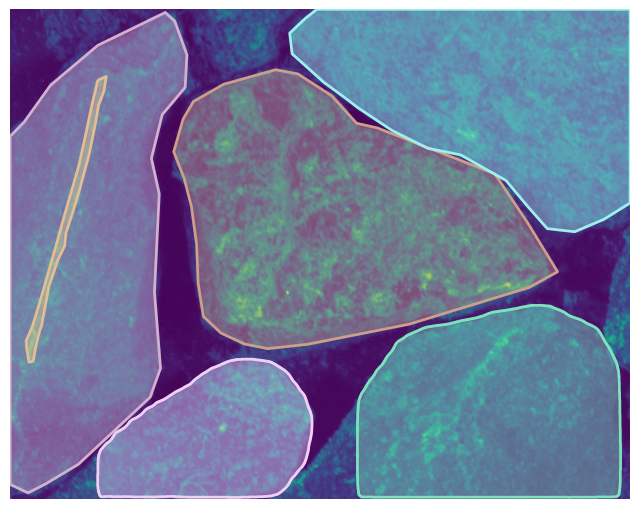

In [11]:
plt.imshow(I); plt.axis('off')
coco.showAnns(anns)

In [12]:
for imgId in imgIds:
    #imgData = coco.getImgIds(imgIds=[imgId])
    img = coco.loadImgs(imgId)[0]
    fname = img['file_name']
    I = io.imread('%s/images/%s'%(dataDir,img['file_name']))
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    mask_sum = [np.zeros((img['height'],img['width']),dtype='uint8')]*len(classes)
    for annotation in anns:
        catId=annotation['category_id']
        mask = coco.annToMask(annotation)
        mask_sum[catId] = mask_sum[catId] | mask
    
    #seg_map = np.zeros((img['height'],img['width']),dtype='uint8')
    seg_map = mask_sum[1]*2
#    seg_map = np.maximum(seg_map,mask_sum[2])

#monochrome    
    #seg_img = Image.fromarray(seg_map)
    
#colored    
    seg_img = Image.fromarray(seg_map).convert('P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8))
    
    seg_img.save('%s/%s'%(outAnnoDir,fname[0:-4]+'.png'))
    
    
    #io.imsave('%s/%s'%(outAnnoDir,fname[0:-4]+'.png'),seg_img,check_contrast=False)
    
    #for catId in range(len(classes)):
   #     io.imsave('%s/%s'%(outAnnoDir,fname[0:-4]+str(catId)+'.png'),mask_sum[catId],check_contrast=False)